# PREPARE GEOFILE FOR BORDER OPERATIONS

- select all countries in the area
- clip world map to surroundings of these countries

In [1]:
import pandas as pd
import geopandas as gpd # geopandas 0.7.0 required; update with conda install --channel conda-forge geopandas

import matplotlib.pyplot as plt

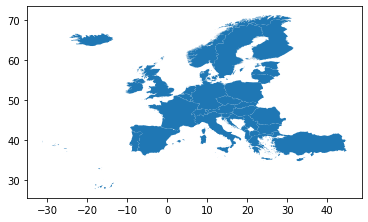

In [2]:
#countries_nuts

zones=gpd.read_file(r"input\NUTS_BN_03M_2016_4326_NUTS3.shp")
countries_nuts=zones[(zones['NUTS_ID'].str[:3]!='FRY')].copy()
countries_nuts = countries_nuts.dissolve(by='CNTR_CODE').reset_index().copy()
countries_nuts.plot()

## World Countries

[Source](https://hub.arcgis.com/datasets/UIA::uia-world-countries-boundaries/data) for world country boundaries shapefile.

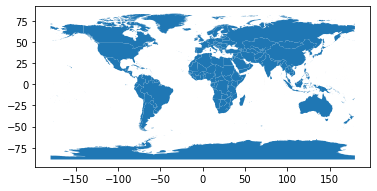

In [3]:
countries_world=gpd.read_file('https://opendata.arcgis.com/datasets/252471276c9941729543be8789e06e12_0.geojson')

#countries_world.head()
countries_world.plot()

In [4]:
from shapely.geometry import Polygon

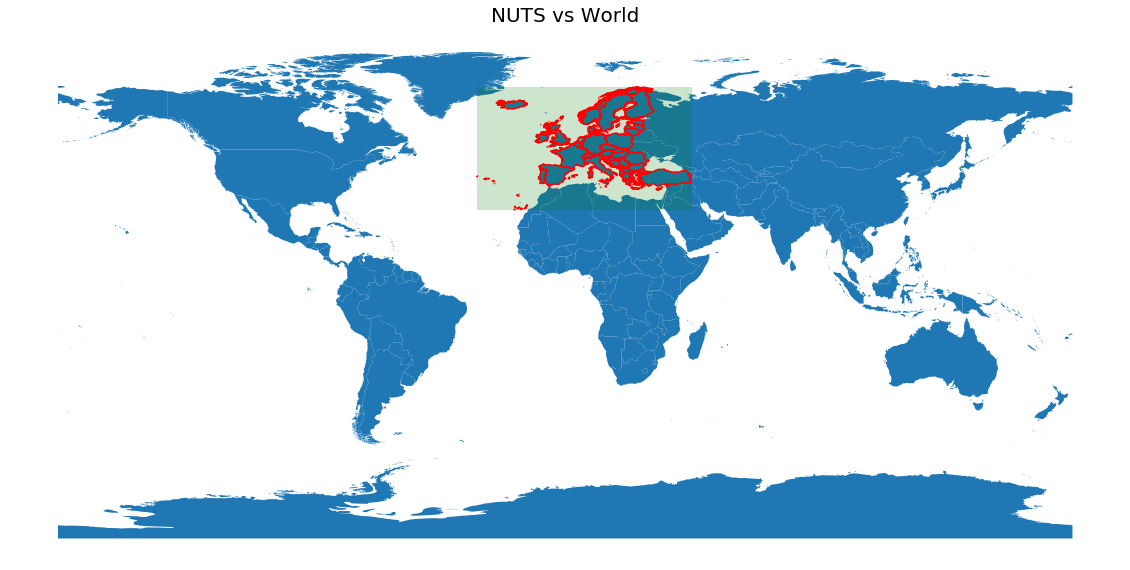

In [5]:
#fig, ax = plt.subplots(figsize=(12, 8))

ax=countries_world.plot(figsize=(20, 15))

countries_nuts.boundary.plot(ax=ax, color="red")

#boundingbox Europe
xmin, ymin, xmax, ymax =countries_nuts.total_bounds
polygon = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon])
poly_gdf.plot(ax=ax, color="green", alpha=0.2)

ax.set_title("NUTS vs World", fontsize=20)
ax.set_axis_off()
plt.show()

C:\Users\thom_nn\.conda\envs\geo_basics\lib\site-packages\geopandas\geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


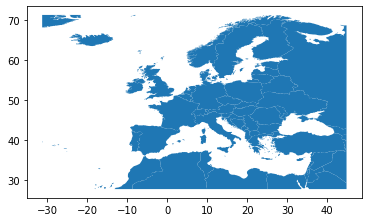

In [6]:
europe_clipped = gpd.clip(countries_world, polygon)
europe_clipped.plot()

In [7]:
europe_clipped.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry
74,75,Gibraltar,GI,United Kingdom,GB,0.144833,0.000786,"POLYGON ((-5.33451 36.16256, -5.33748 36.14895..."
80,81,Morocco,MA,Morocco,MA,56.103257,62.463166,"POLYGON ((-4.42042 35.15125, -4.35792 35.14611..."
81,82,Portugal,PT,Portugal,PT,27.228028,9.641567,"MULTIPOLYGON (((-8.64555 41.01858, -8.65722 41..."
84,85,Greenland,GL,Denmark,DK,942.221329,660.927165,"MULTIPOLYGON (((-21.67182 71.17592, -21.68334 ..."
85,86,Guernsey,GG,United Kingdom,GB,0.416945,0.009025,"POLYGON ((-2.59084 49.42249, -2.59722 49.42249..."


In [9]:
europe_clipped.to_file('input/europe_clipped.gpkg', driver='GPKG')